In [1]:
%load_ext autoreload
%autoreload 2
%load_ext data_agency


In [2]:
# $ data find monthly cpi data

**Search Filters:**
| Source File | Level 1 | Level 2 | Level 3 |
| --- | --- | --- | --- |
| imf_ifs_monthly.csv | ifs_monthly | Inflation |  |


Found 1 series matching query.

Category Selection is appropriate.

#### Analysis of Data Series for Query: 
The selected series, 'imf_ifs_monthly-c_pc', directly addresses the user's query for 'monthly cpi data'. This series represents Consumer Prices, indexed to 2010=100, and is available at a monthly frequency from the IMF's International Financial Statistics (IFS) dataset. This is a standard and reliable source for macroeconomic indicators, providing a direct measure of consumer price levels.

#### Reason for selection:
 The series 'imf_ifs_monthly-c_pc' was selected because its description 'Consumer Prices (2010=100)' and its monthly frequency (indicated by 'imf_ifs_monthly' dataset) perfectly match the user's request for 'monthly cpi data'. It is the most relevant and direct match found in the raw search results.

**Recommended Series:**


,series_code,variable_name,description,frequency,source_file,bilateral
0,imf_ifs_monthly-c_pc,cpi_2010_100,Consumer Price Index (2010=100),M,imf_ifs_monthly.csv,False


_all_meta dataframe has been created with all series metadata.

In [3]:
import pandas as pd
import io

cpi_m_meta_csv = """series_code,variable_name,description,frequency,source_file,bilateral
imf_ifs_monthly-c_pc,cpi_2010_100,Consumer Price Index (2010=100),M,imf_ifs_monthly.csv,False
"""
cpi_m_meta = pd.read_csv(io.StringIO(cpi_m_meta_csv))
cpi_m_meta

,series_code,variable_name,description,frequency,source_file,bilateral
0,imf_ifs_monthly-c_pc,cpi_2010_100,Consumer Price Index (2010=100),M,imf_ifs_monthly.csv,False


In [4]:
# $ data load cpi_m_meta

Data loading code generated to cell below.

In [5]:
from data_agency import load

raw_data = load([cpi_m_meta])

In [6]:
#$ data analyze raw_data
Calculate the annual inflation for the end-2024, and create bar chart of top 20 countries

Starting to generate code for you...

Docker image 'data-agency-runner:py313' not found, building...
Successfully built image 'data-agency-runner:py313'


**Execution Results (Attempt 1):**

```

```

```stderr
/inputs/code.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='annual_inflation', y='cname', data=top_20_inflation, palette='viridis')

```

**Code Assessment:** The generated code meets the requirements.

*Code has been saved to the next cell.*

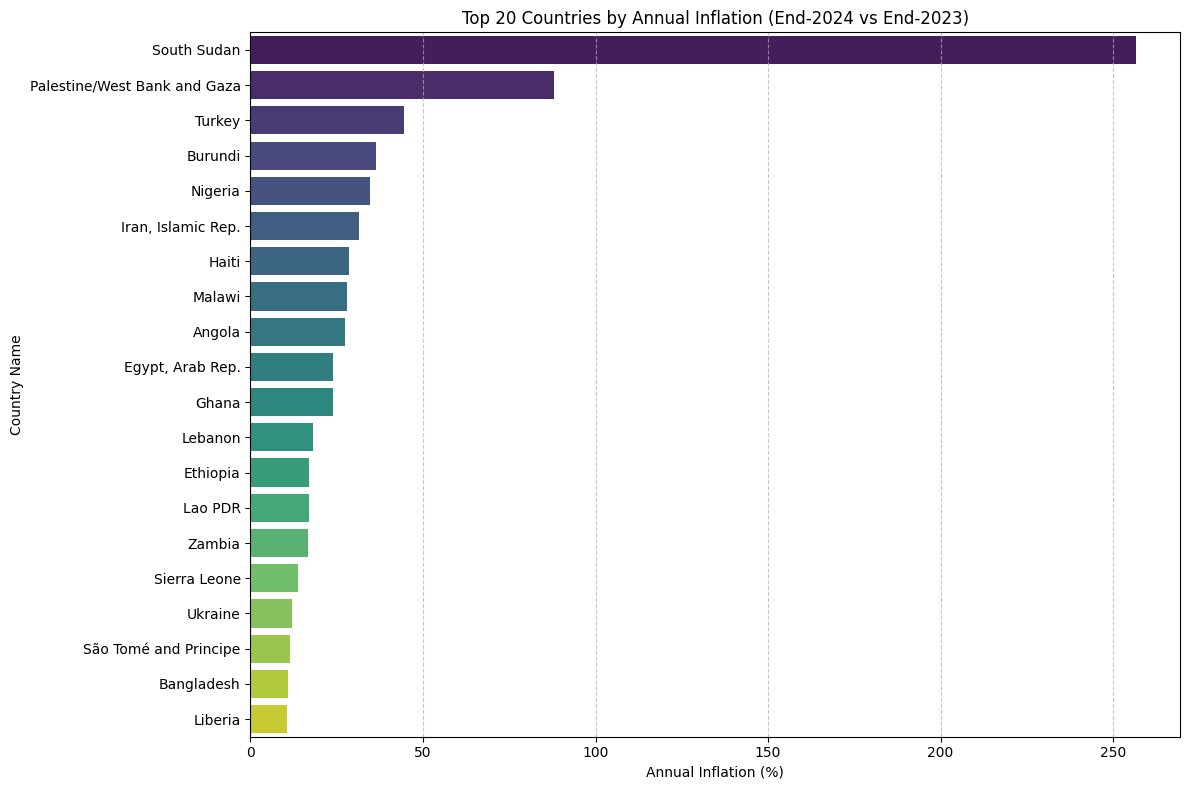

In [7]:
# User request: Calculate the annual inflation for the end-2024, and create bar chart of top 20 countries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'time' column to datetime objects
raw_data["time"] = pd.to_datetime(raw_data["time"])

# Filter data for December of 2023 and 2024
dec_2023_data = raw_data[(raw_data["time"].dt.year == 2023) & (raw_data["time"].dt.month == 12)]
dec_2024_data = raw_data[(raw_data["time"].dt.year == 2024) & (raw_data["time"].dt.month == 12)]

# Merge the two dataframes to get CPI for Dec 2023 and Dec 2024 for each country
inflation_df = pd.merge(
    dec_2023_data[["cname", "cpi_2010_100"]],
    dec_2024_data[["cname", "cpi_2010_100"]],
    on="cname",
    suffixes=("_2023_Dec", "_2024_Dec"),
    how="inner",  # Use inner join to only include countries with data for both periods
)

# Calculate annual inflation
# Inflation = ((CPI_Dec_2024 - CPI_Dec_2023) / CPI_Dec_2023) * 100
inflation_df["annual_inflation"] = (
    (inflation_df["cpi_2010_100_2024_Dec"] - inflation_df["cpi_2010_100_2023_Dec"])
    / inflation_df["cpi_2010_100_2023_Dec"]
) * 100

# Drop rows where inflation could not be calculated (e.g., due to NaN CPI values or division by zero if CPI was 0)
inflation_df.replace([np.inf, -np.inf], np.nan, inplace=True)
inflation_df.dropna(subset=["annual_inflation"], inplace=True)

# Sort by inflation in descending order and get the top 20 countries
top_20_inflation = inflation_df.sort_values(by="annual_inflation", ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x="annual_inflation", y="cname", data=top_20_inflation, palette="viridis")
plt.title("Top 20 Countries by Annual Inflation (End-2024 vs End-2023)")
plt.xlabel("Annual Inflation (%)")
plt.ylabel("Country Name")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()